## **A CUSTOMER CHURN PREDICTION PROJECT**

## **1.0 Business Understanding** ##

**Losing customers is a major cost for any organization. Customer churn, also known as customer attrition or customer turnover, is the percentage of customers who stop using your company’s product or service within a certain period of time. For example, if you started the year with 500 customers and ended with 480 customers, your customer churn rate would be 4%. If we could understand the reasons and the timing of customer churn with reasonable accuracy, it would greatly help the organization to plan and implement effective retention strategies.**

## **Project Description** ###

**This is a Classification project aimed at assisting a telecommunications company understand their data and find the life time value of each customer and know what factors affect the rate at which customers stop using their network. The predictive modelling will be done after a comprehensive analysis of the dataset provided by the business team**

## **The Task** ##

**This project shall explore to understand the dataset and gain insights to enable us create meaningful features that will be used to train a robust machine learning pipeline capable of predicting customer churn and offer valuable insights to the company for strategic decision-making.**

## **1.1 Explanation of Features** ##

*The following is a description of the columns present in the data.*

  **Gender -- Whether the customer is a male or a female**
  
  **SeniorCitizen -- Whether a customer is a senior citizen or not**

  **Partner -- Whether the customer has a partner or not (Yes, No)**

  **Dependents -- Whether the customer has dependents or not (Yes, No)**

  **Tenure -- Number of months the customer has stayed with the company**

  **Phone Service -- Whether the customer has a phone service or not (Yes, No)**

  **MultipleLines -- Whether the customer has multiple lines or not**

  **InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)**

  **OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)**

  **OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)**

  **DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)**

  **TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)**

  **StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)**

  **StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)**

  **Contract -- The contract term of the customer (Month-to-Month, One year, Two year)**

  **PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)**

  **Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))**

  **MonthlyCharges -- The amount charged to the customer monthly**

  **TotalCharges -- The total amount charged to the customer**

  **Churn -- Whether the customer churned or not (Yes or No)**

## **1.2: The Underlying Hypothesis** ##

**A hypothesis is a tentative statement that expresses a possible relationship between two or more variables. It should be testable, specific, and based on existing knowledge or theory. A research question is a question that guides your investigation and seeks to answer a problem or gap in the literature**

## **Null Hypothesis (H0):** ##

**There is no significant relationship between the Total Charges and customer churn.**


## **Alternative Hypothesis (H1):** ##

**There is a significant relationship between the Total Charges and customer churn.**


## **Explanation:** ##

**The null hypothesis assumes that the Total Charges incurred by customers do not have a notable impact on whether they are likely to stop using the service (churn). In other words, the amount a customer pays doesn't play a significant role in their decision to churn**

**The alternative hypothesis suggests the opposite. It proposes that there is a noticeable relationship between the Total Charges a customer accumulates and their likelihood of churning. In simpler terms, it implies that the amount a customer pays may have a significant influence on whether they decide to leave the service.**


## **Implication:** ##

**If Null Hypothesis Holds: Total Charges may not be a decisive factor in predicting customer churn. Other factors might be more relevant, and the company may need to look beyond the amount customers pay to understand churn behavior.**

**If Alternative Hypothesis Holds (is True): Total Charges could be a crucial factor influencing customer churn. The company would have to pay attention to how much customers are charged, as it may strongly impact their decision to continue or discontinue using the service. This information could be valuable for customer retention strategies.**

## **1.3: Research Questions** ##

## **Research question 1** ##

**How do different services (PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, etc.) contribute to customer churn?**

*Explanation:*
*We aim to understand the impact of different services on whether customers decide to churn or continue using the service. This involves exploring how specific offerings like phone service options, multiple lines, internet service features, online security, and backup contribute to the likelihood of customer churn.*

*Implications:*
*Identifying which services have a significant influence on churn can help the company prioritize improvements or tailor retention strategies for specific service features.*


## **Research question 2** ##

**Is there any correlation between gender, age (SeniorCitizen), having a partner, having dependents, and customer churn?**


*Explanation:*
*We are investigating if factors like gender, age, relationship status, and contract type are correlated with the likelihood of customer churn. Additionally, we want to understand if different contract durations result in varied churn behavior.*

*Implications:*
*Understanding the correlation between these demographic and contractual factors and churn can guide the development of targeted strategies to retain customers based on their specific characteristics*


## **Research question 3** ##

**How does the contract type (Contract) and billing preferences (PaperlessBilling, PaymentMethod) influence customer churn?**

*Explanation:*
*This question delves into the influence of contract types and billing preferences on whether a customer decides to churn. We're exploring how different contract structures and billing choices impact the probability of churn.*

*Implications:*
*Insights gained from this analysis can inform the development of contract and billing strategies that minimize churn and enhance customer retention*


## **Research question 4** ##

**Is there a correlation between monthly charges (MonthlyCharges), total charges (TotalCharges), and customer churn?**

*Explanation:*
*We are investigating if there is a correlation between the amount customers are charged on a monthly basis and their total charges with the probability of churning.*

*Implications:*
*Identifying a correlation can help the company understand how pricing structures relate to churn, allowing for adjustments in pricing strategies or the introduction of targeted offers to retain customers*


## **Research question 5** ##

**To what extent does the presence of tech support services and device protection influence customer retention?**

*Explanation:*
*We aim to explore the degree to which having access to tech support services and device protection affects whether customers choose to continue using the services. This involves understanding the impact of these support features on the likelihood of retaining customers over time.*

*Implications:*
*Identifying the influence of tech support and device protection on customer retention can guide strategic decisions on service enhancements. If these features significantly contribute to customer satisfaction and retention, investing in their improvement may be a valuable approach to fostering long-term customer relationships.*

## **2.0 Data Understanding** ##

**2.1: Installing and Importing  Packages**

**2.1.1: Installing the necessary libraries** 

In [1]:
# Installing the required libraries for the notebook to accomodate the codes
# pip install pyodbc  
# pip install python-dotenv 
# pip install numpy
# pip install matplotlib
# pip install seaborn
# pip install pandas
# pip install currency_converter
# pip install forex-python
# pip install scipy
# pip install forex-python
# pip install statsmodels

**2.1.2: Importing the required Packagies to work with**

In [2]:
# #Data Visualization packages
# import matplotlib.pyplot as plt
# import seaborn as sns
 
# # Machine learning Packages
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
# from sklearn.preprocessing import OneHotEncoder , LabelEncoder , OrdinalEncoder
# from sklearn.preprocessing import FunctionTransformer
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.model_selection import train_test_split
# from sklearn import set_config
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import GradientBoostingClassifier
# from scipy.stats import pearsonr
 
# # Database connection package
# import pyodbc
 
# # Ignore warnings (optional)
# import warnings
# warnings.filterwarnings("ignore")

In [3]:
# Importing the needed libraries 
# pandas to clean and manipulate the data
# numpy for basic calculation
# seaborn and matplolib for visualition

# Data manipulation packages
import pyodbc
# import the dotenv_values function from the dotenv package      
from dotenv import dotenv_values    
import pandas as pd
import warnings
import numpy as np

# Statistical analysis
from sklearn.impute import SimpleImputer
from forex_python.converter import CurrencyRates
import re
from scipy.stats import chi2_contingency
from scipy.stats import ks_2samp
import scipy.stats
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from scipy.stats import kruskal, mannwhitneyu

# Machine learning Packages
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder , LabelEncoder , OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import pearsonr

# Data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings ('ignore')

In [4]:
import pydantic
print(pydantic.VERSION)


2.5.2


## **2.2: Data Loading** ##

**Loading the environment variables  from .env file into a dictionary using the values for the credentials set in the '.env' file. Connecting to the Microsoft SQL Server database to retrieve data by creating a connection string to the remote database server**

In [5]:
# Loading environment variables from .env file into a dictionary.
environment_variables = dotenv_values('.env')


# Getting the values for the credentials set in the '.env' file and creating a connection string
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")


connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

**Using the connect method of the pyodbc library to pass in the connection string to connect to the server**

In [6]:
# Establishing connection to the database server
connection = pyodbc.connect(connection_string)

**Loading the First Dataset from the Microsoft SQL Server**

In [7]:
# Querrying the Microsoft SQL database to fetch the First dataset 

query = "SELECT * FROM LP2_Telco_churn_first_3000"

FirstDataset = pd.read_sql(query, connection)

**Saving FirstDataset to CSV**

In [8]:
# Save the DataFrame to a CSV file
FirstDataset.to_csv("churn_data.csv", index=False)


In [9]:
FirstDataset.shape

(3000, 21)

**Viewing the first few rows of FirstDataset**

*There are 3000 observations(rows) and 21 variables(columns) in FirstDataset*

In [10]:
FirstDataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


**Loading Second 2000 Dataset from the GitHub repository and third Dataset from OneDrive file using the file path method**

In [11]:
# Loading the second dataset stating the full file path
file_path_second = r'C:\Users\user\OneDrive\Desktop\MY DS CAREER ACCELERATOR\Customer_Churn_Prediction_Problem\LP2_Telco-churn-last-2000.csv'

# Load the second dataset into a DataFrame
SecondDataset = pd.read_csv(file_path_second)

**Viewing the first few rows of SecondDataset**

In [12]:
SecondDataset.shape

(2043, 21)

*There are 2043 observations(rows) and 21 variables(columns) in SecondDataset*

In [13]:
SecondDataset.head(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes


In [14]:
# Loading the Third dataset stating the full file path
file_path_second = r'C:\Users\user\OneDrive\Desktop\MY DS CAREER ACCELERATOR\Customer_Churn_Prediction_Problem\Telco-churn-second-2000.xlsx'

# Load the second dataset into a DataFrame
ThirdDataset = pd.read_excel(file_path_second)

**Saving ThirdDataset to CSV**

In [15]:
# Save the DataFrame to a CSV file
ThirdDataset.to_csv("Telco-churn-second-2000.csv", index=False)

**Viewing the first few rows of ThirdDataset**

In [16]:
ThirdDataset.shape

(2000, 20)

*There are 2000 observations(rows) and 20 variables(columns) in ThirdDataset*

In [17]:
# Display the first few rows of the second dataset
ThirdDataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


**The Third dataset is the test dataset. It will be used for testing the acuracy of the models**

**We will proceed to do FirstDataset.info() and SecondDataset.info()**

In [18]:
FirstDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [19]:
SecondDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


**Observations in FirstDataset**

*data.info() shows the variables Churn, TotalCharges, StreamingMovies, StreaminTV, TechSupport, DeviceProtection, OnlineBackup, OnlineSecurity, and MultipleLines have missing values.* 

*Numeric variables like TotalCharges, MonthlyCharges, and Tenure, are of datatype as float64 and int64.* 

*Categorical variables like Churn, PaymentMethod, Contract, StreamingMovies, StreamingTv, TechSupport, DeviceProtection, OnlineBackup, OnlineSecurity, InternetService, MultipleLines, gender and CustomerID are of object data type*

*Other categorical variables like PaperlessBilling, PhoneService, Dependents,Partner, and SeniorCtizen are of boolean data types*

*FirstDataset.isnull().sum() shows the variables Churn, TotalCharges, StreamingMovies, StreaminTV, TechSupport, DeviceProtection, OnlineBackup, OnlineSecurity, and MultipleLines have missing values.*

*FirstDataset.duplicated().sum() shows there are no duplicates in FirstDataset*

**Observations in SecondDataset**

*data.info() shows SecondDataset have no missing values.* 

*Numeric variables like MonthlyCharges, and Tenure, are of datatype as float64 and int64.*

*Categorical variables like Churn, PaymentMethod, PaperlessBilling, Contract, StreamingMovies, StreamingTv, TechSupport, DeviceProtection, OnlineBackup, OnlineSecurity, InternetService, MultipleLines, PhoneService, Dependents, Partner, gender and CustomerID are of object data type*

*Categorical variables like Churn, PaymentMethod, Contract, StreamingMovies, StreamingTv, TechSupport, DeviceProtection, OnlineBackup, OnlineSecurity, InternetService, MultipleLines, gender and CustomerID are of object data type

*SecondDataset.duplicated().sum() shows there are no duplicates in SecondDataset*

**Take Note**

*TotalCharges should not be an object data type but a float*

*SeniorCitizen should not be an Int64 but an boolean*

*Dependents should not be an object but a boolean*

*PaperlessBilling should not be an object but a boolean*

*Partner should not be an object but a boolean*


## Standardizing columns before concatenating

*The code below is transforming columns in FirstDataset with boolean values into categorical values ('Yes' or 'No').*

In [20]:
# Looping through the columns to change the boolean datatypes in the first data to objects
boolean_columns = ['SeniorCitizen','Partner','Dependents','Churn','PhoneService','MultipleLines','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']
 
for col in boolean_columns:
    FirstDataset[col] = FirstDataset[col].map({True: 'Yes', False: 'No'})

*These lines of code are preparing the data for analysis or machine learning by converting certain columns to a more suitable format. The first line is changing a column with 'Yes' and 'No' values to 1s and 0s. The second and third lines are cleaning and converting the 'TotalCharges' column to ensure it contains numeric values of the float datatype*

In [21]:
# Changing the senior citizen column in the second dataset from yes and no to 1 and 0
FirstDataset['SeniorCitizen'] = FirstDataset['SeniorCitizen'].map({'Yes': 1, 'No': 0})
# removing the non-numeric characters from the total charges column
SecondDataset['TotalCharges'] = pd.to_numeric(SecondDataset['TotalCharges'], errors='coerce')
# changing the total charges column from an object to a float datatype
SecondDataset['TotalCharges'] = SecondDataset['TotalCharges'].astype(float)

 *Modifying the values in specific columns of the DataFrame FirstDataset.*

In [22]:
FirstDataset['MultipleLines']= FirstDataset['MultipleLines'].replace({False:'No', True:'Yes', None:'No phone service'})
FirstDataset['PhoneService']= FirstDataset['PhoneService'].replace({False:'No', True:'Yes', None:'No phone service'})
FirstDataset['DeviceProtection']= FirstDataset['DeviceProtection'].replace({False:'No', True:'Yes', None:'No phone service'})
FirstDataset['TechSupport']= FirstDataset['TechSupport'].replace({False:'No', True:'Yes', None:'No phone service'})
FirstDataset['PaperlessBilling']= FirstDataset['PaperlessBilling'].replace({False:'No', True:'Yes', None:'No phone service'})
FirstDataset['StreamingTV']= FirstDataset['StreamingTV'].replace({False:'No', True:'Yes', None:'No phone service'})
FirstDataset['StreamingMovies']= FirstDataset['StreamingMovies'].replace({False:'No', True:'Yes', None:'No phone service'})
FirstDataset['OnlineSecurity']= FirstDataset['OnlineSecurity'].replace({False:'No', True:'Yes', None:'No phone service'})
FirstDataset['OnlineBackup']= FirstDataset['OnlineBackup'].replace({False:'No', True:'Yes', None:'No phone service'})

*Merging FirstDataset and SecondDataset*

In [23]:
# Merging two datasets
df_concat = pd.concat([FirstDataset,SecondDataset])

df_concat.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.50,No


## **2.3: Exploratory Data Analysis (EDA)** ##

### 2.3.1: Exploring data (info, duplicated, null values, describe)

*The following code is using the pandas_profiling library to create a detailed report on the df_concat DataFrame, display it in a Jupyter Notebook, and save the report as an HTML file for further analysis or sharing*

In [24]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     5043 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    5043 non-null   object 
 10  OnlineBackup      5043 non-null   object 
 11  DeviceProtection  5043 non-null   object 
 12  TechSupport       5043 non-null   object 
 13  StreamingTV       5043 non-null   object 
 14  StreamingMovies   5043 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 
 17  

In [25]:
# checked for duplicated values
df_concat.duplicated().sum()

# there was no duplicated values

0

In [26]:
df_concat.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.400000,35.775000,70.550003,90.050003,118.650002
TotalCharges,5035.0,2302.062861,2269.483576,18.799999,417.675003,1401.150024,3862.000000,8670.100000


**Key Insights**

**Tenure:** *The data on tenure suggests that, on average, customers have been with the service for approximately 32.58 months. The distribution is somewhat right-skewed, as the median (29 months) is less than the mean. The range of tenure is from 0 to 72 months, with most customers having a tenure between 9 and 56 months.*

**Monthly Charges:** *The data on monthly charges indicates that, on average, customers pay around $65.09 per month. The distribution is somewhat right-skewed, with the median (70.55) being greater than the mean. Monthly charges range from $18.40 to $118.65, with most customers paying between $35.78 and $90.05.*

**Total Charges:** *The data on total charges shows that, on average, customers have paid around $2300.69 in total charges. The distribution is right-skewed, with the median (1400.70) being less than the mean. Total charges range from $0.00 to $8670.10, with most customers having total charges between $417.13 and $3860.60.*


**Viewing Summary Statistics of categorical columns in df_concat**

In [27]:
df_concat.describe(include='object').T

,count,unique,top,freq
customerID,5043,5043,7590-VHVEG,1
gender,5043,2,Male,2559
Partner,5043,2,No,2585
Dependents,5043,2,No,3482
PhoneService,5043,2,Yes,4554
MultipleLines,5043,3,No,2424
InternetService,5043,3,Fiber optic,2248
OnlineSecurity,5043,4,No,2507
OnlineBackup,5043,4,No,2231
DeviceProtection,5043,4,No,2219


**Using the box plot to check the central tendency, spread, and potential outliers in df_concat.**

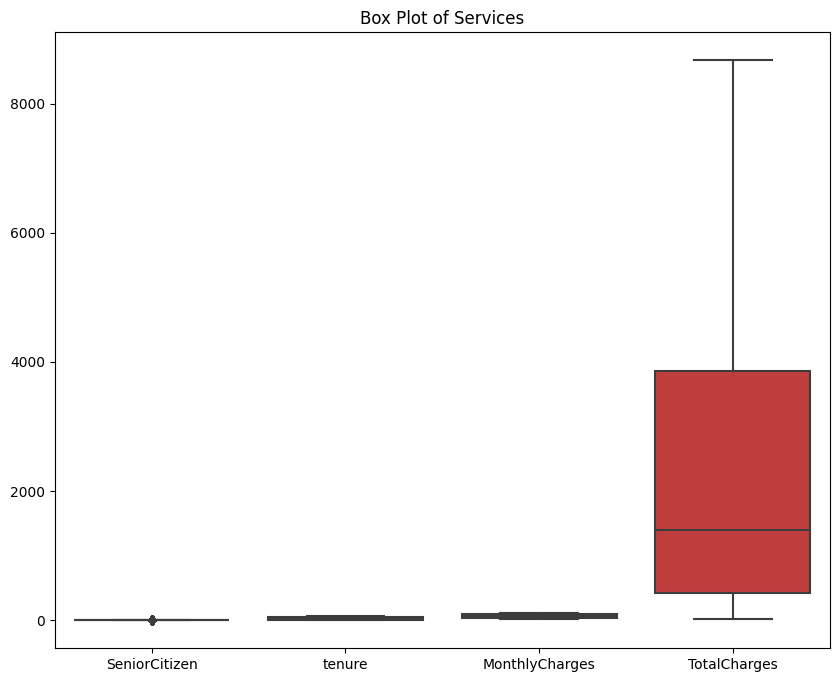

In [28]:
# Create a box plot
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_concat)
plt.title('Box Plot of Services')
plt.show()

**Key Insights**: *The column 'Totalcharges' has a lot of outliers*

### 2.3.2: Univariate Analysis 
*Explore individual variables for insights.*

**Generating histograms to visualize the distribution of numerical data in df_concat** 

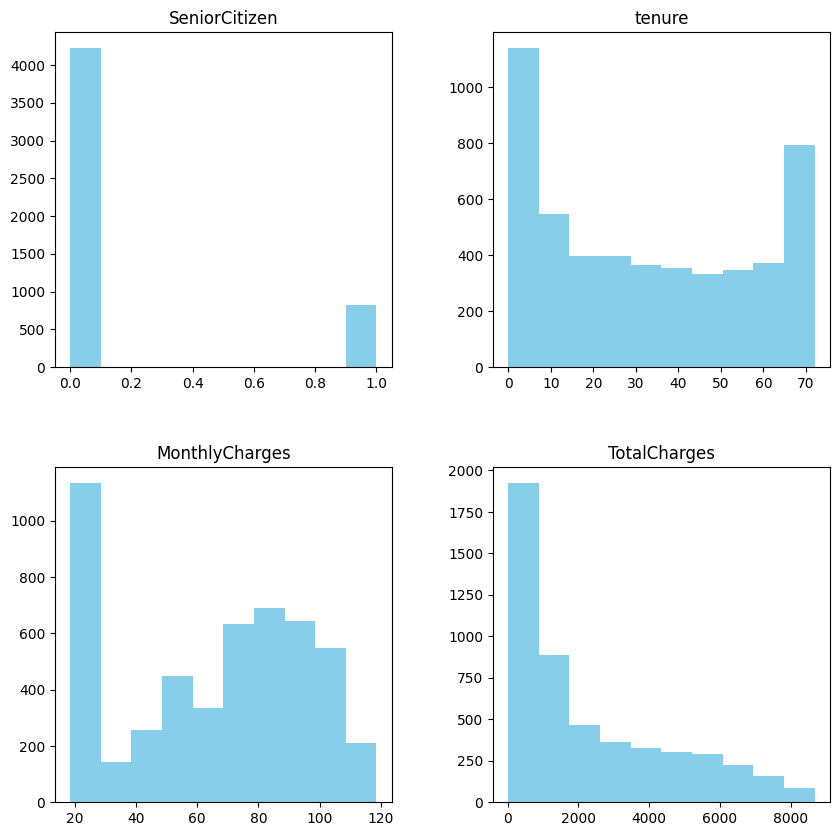

In [29]:
df_concat.hist(figsize=(10,10),grid=False,color = 'skyblue')
plt.show()

**Key Insights:**

*The distribution of the monthly charges seems to follow the bell curve of a normal distribution*

*Total charges column is positively skewed*

*The numerical columns depicted by the histogram shows abnormal distribution, some like the monthly charges column are negatively skewed and will need nomalization in the data preparation phase*

**Generating a KDE plot specifically for the 'tenure' column, offering a smooth and continuous representation of the distribution of 'tenure' values in the df_concat DataFrame**

<Axes: ylabel='Density'>

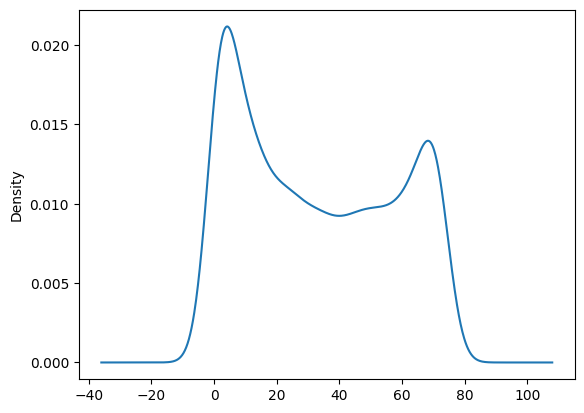

In [30]:
df_concat['tenure'].plot(kind= 'kde')

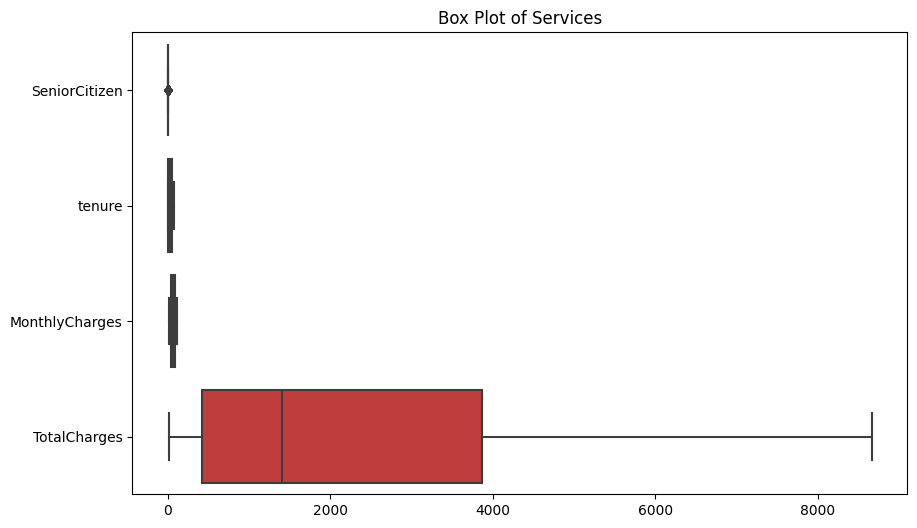

In [31]:
# Create a box plot to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_concat,orient='h')
plt.title('Box Plot of Services')
plt.show()

**Key Insights**

**SeniorCitizen:**
*The variable takes values of 0 and 1, representing non-senior and senior citizens.To explore the impact of being a senior citizen on customer behavior or preferences.*

**Tenure:**
*The minimum tenure is 0, and the maximum is 72. To investigate customers with very short or long tenures to understand factors contributing to their behavior.*

**MonthlyCharges:**
*Monthly charges range from $18.40 to $118.65.To explore customer segments with high or low monthly charges and tailor strategies accordingly.*

### 2.3.3: Bivariate Analysis
*Investigating relationships between pairs of variables.*

**Calculating the correlation matrix for numerical columns in the df_concat DataFrame, helping to identify relationships and dependencies between different numerical variables**

In [32]:
correlation = df_concat.corr(numeric_only=True)

correlation

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.004597,0.221780,0.095212
tenure,0.004597,1.000000,0.240645,0.826264
MonthlyCharges,0.221780,0.240645,1.000000,0.647007
TotalCharges,0.095212,0.826264,0.647007,1.000000


**Creating a heatmap to visually represent the correlation matrix (correlation) between numerical variables in the dataset.**

<Axes: >

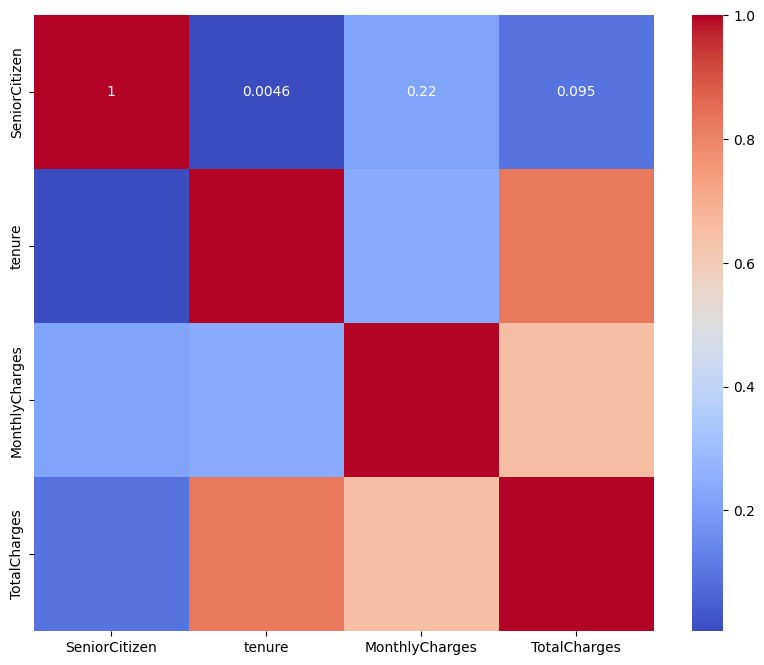

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(data = correlation,annot = True,cmap = 'coolwarm')

**Key Insights**

**SeniorCitizen:**
*There is a weak positive correlation with MonthlyCharges (0.22), suggesting that SeniorCitizens tend to have slightly higher monthly charges.*
*A positive correlation with TotalCharges (0.095) indicates that SeniorCitizens tend to have higher total charges.*

**Partner:**
*A positive correlation with Dependents (0.666) indicates that individuals with partners are more likely to have dependents.*
*A positive correlation with PaperlessBilling (0.26) suggests that customers with partners are more likely to use paperless billing*

**Dependents:**
*A strong positive correlation with Partner (0.666) indicates that customers with dependents are more likely to have partners.*
*A positive correlation with PaperlessBilling (0.25) suggests that customers with dependents are more likely to use paperless billing*

**Tenure:**
*A strong positive correlation with TotalCharges (0.826) indicates that as tenure increases, total charges also tend to increase.*
*A moderate positive correlation with MonthlyCharges (0.24) suggests that customers with longer tenure tend to have slightly higher monthly charges*

**PhoneService:**
*A positive correlation with PaperlessBilling (0.102) indicates that customers with phone service are slightly more likely to use paperless billing.*
*Weak positive correlations with other variables suggest limited direct relationships.*

**PaperlessBilling:**
*A positive correlation with MonthlyCharges (0.235) indicates that customers using paperless billing tend to have slightly higher monthly charges.*
*A positive correlation with TotalCharges (0.109) suggests that paperless billing customers tend to have higher total charges*

**MonthlyCharges:**
*A strong positive correlation with TotalCharges (0.647) indicates that as monthly charges increase, total charges also tend to increase.*
*Positive correlations with SeniorCitizen (0.22) and PaperlessBilling (0.235) suggest specific customer segments and billing preferences are associated with higher monthly charges*

**TotalCharges:**
*A strong positive correlation with Tenure (0.826) suggests that as tenure increases, total charges also tend to increase.*
*Positive correlations with MonthlyCharges (0.647) and SeniorCitizen (0.095) indicate associations with higher total charges.*

### 2.3.4: Multivariate Analysis
*Examining interactions between three or more variables.*

**Generating a pair plot using Seaborn to visualize relationships between variables in the df_concat DataFrame, specifically focusing on the 'gender,' 'SeniorCitizen,' and 'MonthlyCharges' columns.**

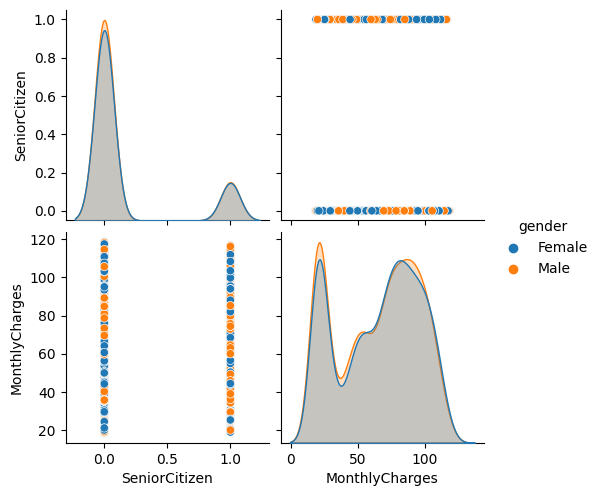

In [34]:
data = df_concat[['gender','SeniorCitizen','MonthlyCharges']]

sns.pairplot(data,hue='gender')

## **3.0: Answering Analytical questions** ##

### Q1. What is the distribution of churn for different service types?

**Viewing a tabular distribution of churn across different categories (in this case, different types of Internet services).**

In [35]:
churn_counts = df_concat.groupby(['InternetService', 'Churn']).size().unstack()
churn_counts

Churn,No,Yes
InternetService,,
DSL,1406,309
Fiber optic,1296,951
No,1004,76


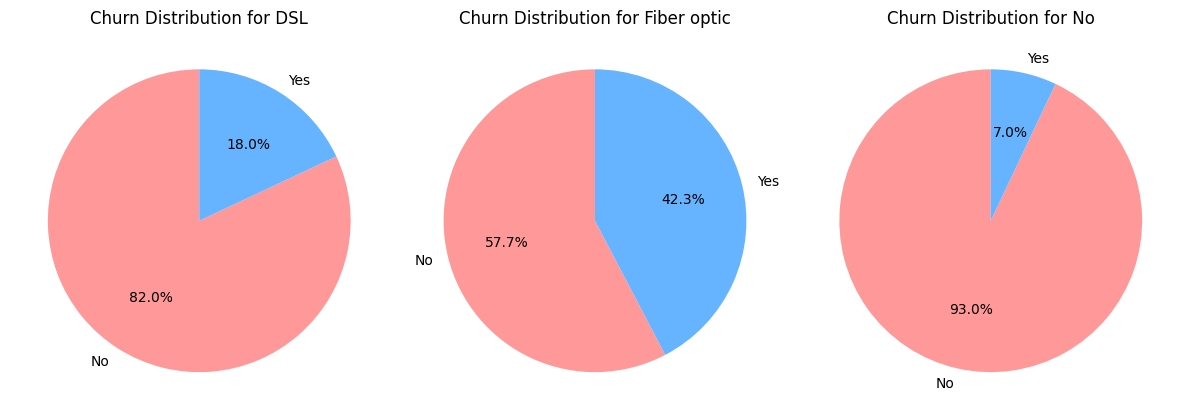

In [36]:
# Plot a pie chart for each internet service category
plt.figure(figsize=(12, 5))

for i, service_type in enumerate(churn_counts.index):
    plt.subplot(1, 3, i + 1)
    plt.pie(churn_counts.loc[service_type], labels=churn_counts.columns, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
    plt.title(f'Churn Distribution for {service_type}')

plt.tight_layout()
plt.show()

**Interpretation**

**For DSL Customers:**

*835 customers did not churn, and 171 customers churned.*
*571 have DSL and did not churn, while 138 have DSL and churned.*

**For Fiber Optic Customers:**

*772 customers did not churn, and 570 customers churned.*
*524 have fiber optic and did not churn, while 381 have fiber optic and churned.*

*For Customers Without Internet Service (No):*

*612 customers did not churn, and 39 customers churned.*
*392 have no internet service and did not churn, while 37 have no internet service and churned.*

**Business Implications:**

*The table helps identify patterns in churn based on the type of internet service. For example, customers with fiber optic service seem to have a higher churn rate compared to DSL customers.*

*Understanding these patterns can guide business decisions. For instance, if fiber optic customers are more likely to churn, the company might investigate reasons behind this and take steps to improve service quality or offer incentives to retain these customers.*

*The data also shows churn among customers without internet service. This could be due to various reasons such as dissatisfaction with other services provided by the company. Exploring the reasons behind churn in this segment could lead to strategies for customer retention or service improvement.*

*In summary, the table provides valuable insights into customer churn based on different service types, helping businesses tailor their strategies for customer retention and satisfaction*

Q2.Is there any correlation between gender, age (SeniorCitizen), having a partner, having dependents, and customer churn?

In [37]:
# Check the unique values and data types in the 'Churn' column
unique_churn_values = df_concat['Churn'].unique()
dtype_churn_column = 'object'

# Output the unique values and data type
print(f'{True}, {False}, {None}, {"Yes"}, {"No"} {dtype_churn_column}')


True, False, None, Yes, No object


In [38]:
# Drop NaN values in the 'Churn' column
df_concat = df_concat.dropna(subset=['Churn'])


['No' 'Yes']
object


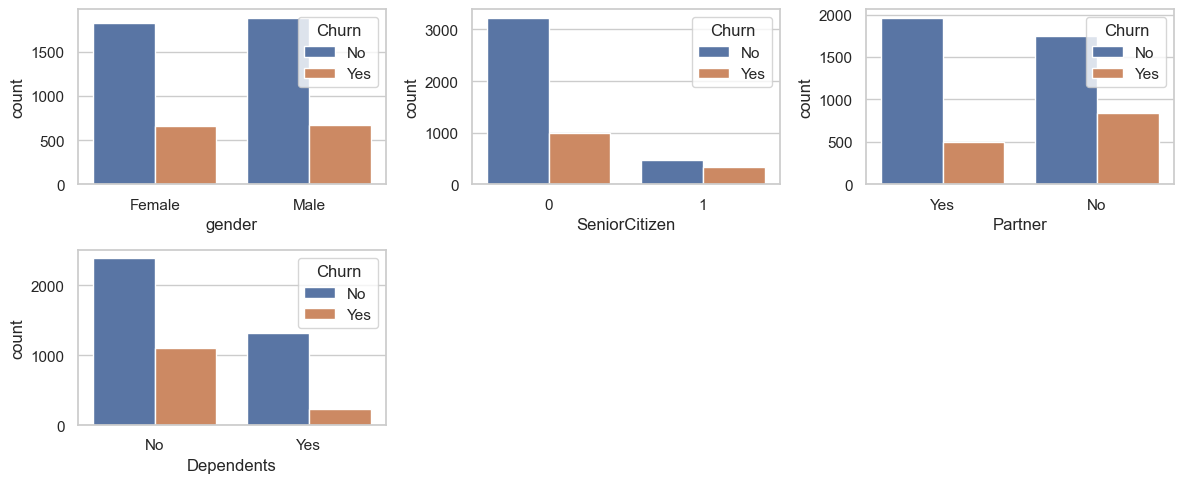

In [39]:
# Convert 'Churn' to string type
df_concat['Churn'] = df_concat['Churn'].astype(str)

# Check the unique values and data types in the 'Churn' column
print(df_concat['Churn'].unique())
print(df_concat['Churn'].dtype)

# Now, you can proceed with your countplot
sns.set(style="whitegrid")

# Plotting gender distribution
plt.figure(figsize=(12, 5))
plt.subplot(2, 3, 1)
sns.countplot(x='gender', hue='Churn', data=df_concat)

# Plotting SeniorCitizen distribution
plt.subplot(2, 3, 2)
sns.countplot(x='SeniorCitizen', hue='Churn', data=df_concat)

# Plotting Partner distribution
plt.subplot(2, 3, 3)
sns.countplot(x='Partner', hue='Churn', data=df_concat)

# Plotting Dependents distribution
plt.subplot(2, 3, 4)
sns.countplot(x='Dependents', hue='Churn', data=df_concat)

# Adjust layout
plt.tight_layout()
plt.show()


**Key Insights and Recommendations:**

*The male gender is less likely to churn as compared to females*
*Seniorcitizens are less likely to churn*
*The customers with partners are more likely to churn than the customers without partners*
*Customers with dependants are more likely to churn than the ones without*

### Q3: How does the contract type (Contract) and billing preferences (PaperlessBilling, PaymentMethod) influence customer churn?

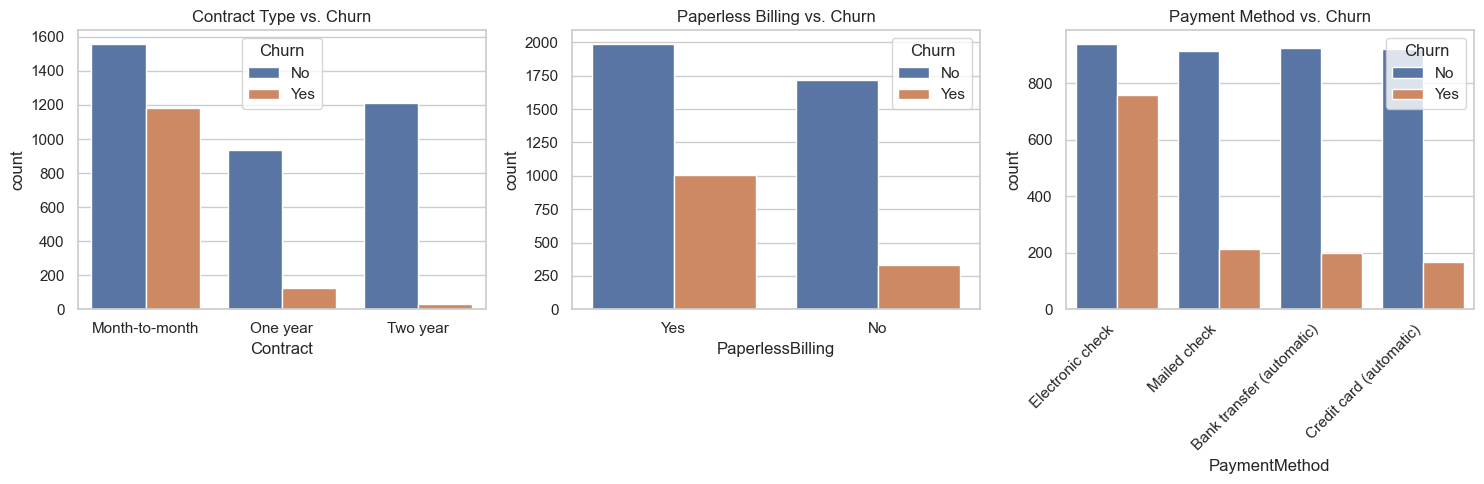

In [40]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Plotting contract type distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='Contract', hue='Churn', data=df_concat)
plt.title('Contract Type vs. Churn')

# Plotting paperless billing distribution
plt.subplot(1, 3, 2)
sns.countplot(x='PaperlessBilling', hue='Churn', data=df_concat)
plt.title('Paperless Billing vs. Churn')

# Plotting payment method distribution
plt.subplot(1, 3, 3)
sns.countplot(x='PaymentMethod', hue='Churn', data=df_concat)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('Payment Method vs. Churn')

# Adjust layout
plt.tight_layout()
plt.show()

**Key Insights and recommendations:**

*Customers with month to month contract type are likely to churn as compared to customers with long term contracts of one year and above*
*The company should consider giving incentives to long term contracts to attract more customers to subscribe*

### Q4: Is there a correlation between monthly charges (MonthlyCharges), total charges (TotalCharges), and customer churn?

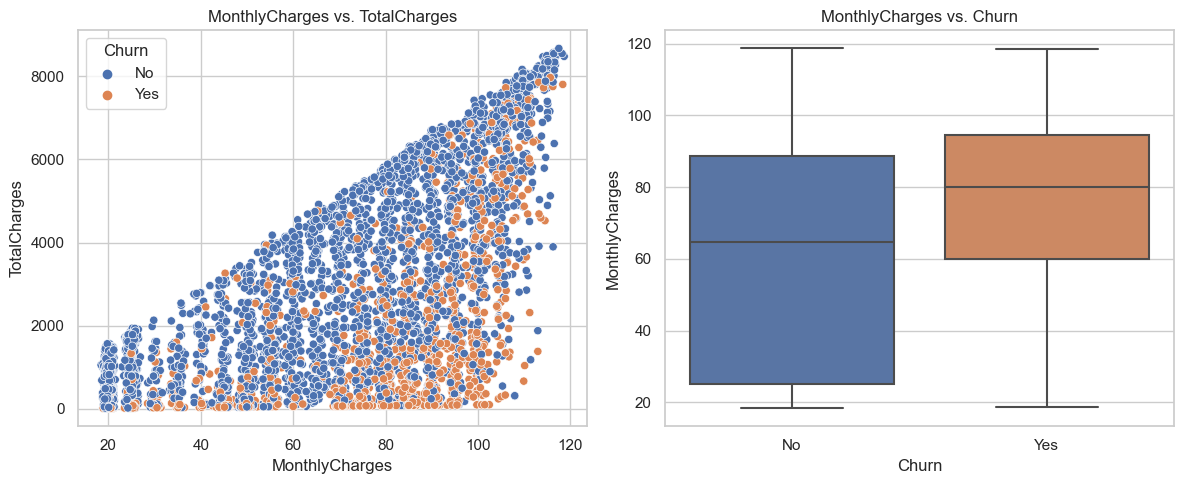

In [41]:
sns.set(style="whitegrid")

# Scatter plot for MonthlyCharges vs. TotalCharges
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=df_concat)
plt.title('MonthlyCharges vs. TotalCharges')

# Box plot for MonthlyCharges vs. Churn
plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_concat)
plt.title('MonthlyCharges vs. Churn')

# Adjust layout
plt.tight_layout()
plt.show()

**Key Insights:**

*The MonthlyCharges seem to have a correlation with the TotalCharges and they both seem to have a positive correlation with churn rate*

In [42]:
corr = df_concat['MonthlyCharges'].corr(df_concat['TotalCharges'])
print(f"Correlation between MonthlyCharges and TotalCharges: {correlation}")

Correlation between MonthlyCharges and TotalCharges:                 SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.004597        0.221780      0.095212
tenure               0.004597  1.000000        0.240645      0.826264
MonthlyCharges       0.221780  0.240645        1.000000      0.647007
TotalCharges         0.095212  0.826264        0.647007      1.000000


### Q5. Is there a relationship between gender and the churn rate?

In [43]:
df_concat.groupby('gender')['Churn'].value_counts()

gender  Churn
Female  No       1823
        Yes       661
Male    No       1883
        Yes       675
Name: count, dtype: int64

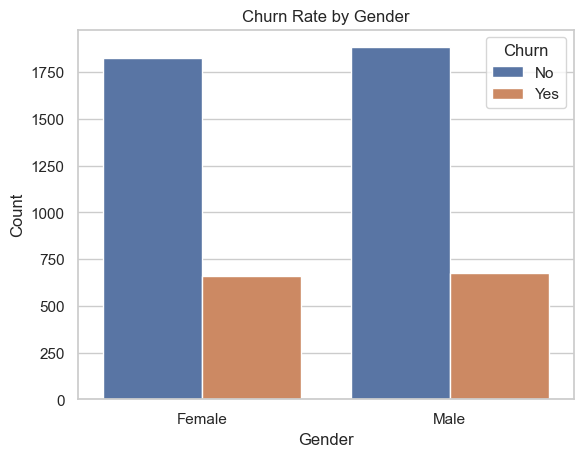

In [44]:
sns.countplot(x='gender', hue='Churn', data=df_concat)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Churn Rate by Gender')

# Show the plot
plt.show()

### Q6: How does internet service affect churn rate?

Text(0, 0.5, 'Count')

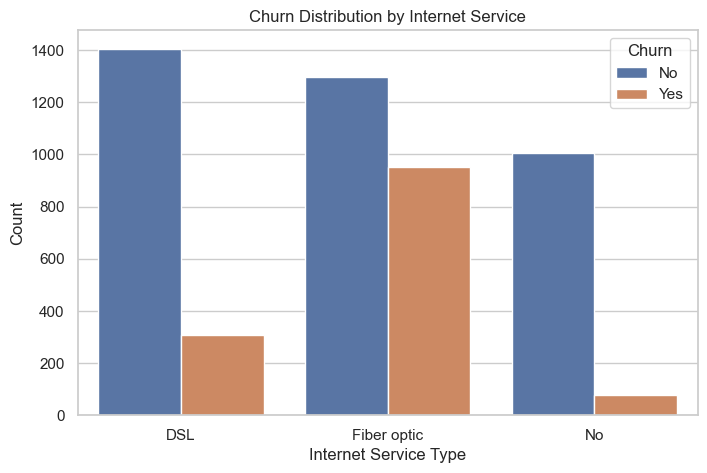

In [45]:
sns.set(style="whitegrid")

# Count plot for Churn based on InternetService
plt.figure(figsize=(8, 5))
sns.countplot(x='InternetService', hue='Churn', data=df_concat)
plt.title('Churn Distribution by Internet Service')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')

### Q7: Are senior citizens more likely to churn?

Text(0, 0.5, 'Count')

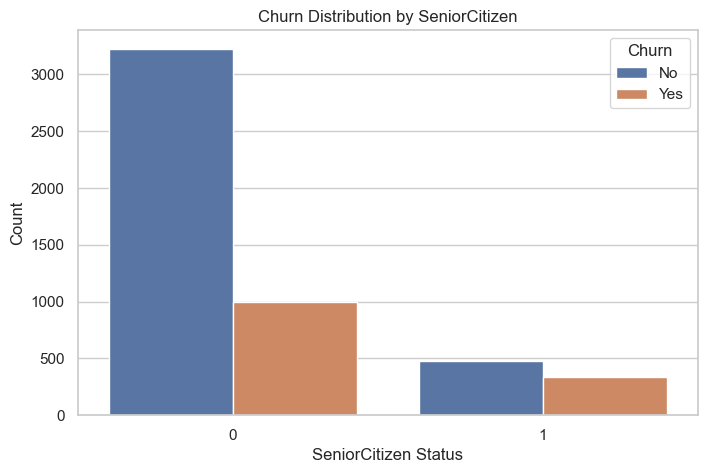

In [46]:
sns.set(style="whitegrid")

# Count plot for Churn based on SeniorCitizen status
plt.figure(figsize=(8, 5))
sns.countplot(x='SeniorCitizen', hue='Churn', data=df_concat)
plt.title('Churn Distribution by SeniorCitizen')
plt.xlabel('SeniorCitizen Status')
plt.ylabel('Count')

### Q8: What is the churn rate in percentage?

In [47]:
# calculating the no of churned customers
churned_customers = df_concat[df_concat['Churn']=='Yes'].shape[0]

churned_customers

1336

In [48]:
# overall customers
total_customers = df_concat.shape[0]

total_customers

5042

In [49]:
churn_rate = (churned_customers/total_customers) * 100

print('Overall churn rate is {:.2f}%'.format (churn_rate))

Overall churn rate is 26.50%


## **4.0: Testing Hypothesis** ##

## **Null Hypothesis (H0):** ##

**There is no significant relationship between the Total Charges and customer churn.**


## **Alternative Hypothesis (H1):** ##

**There is a significant relationship between the Total Charges and customer churn.**

In [50]:
import pandas as pd
import scipy.stats as stats

# Assuming df_concatenated is your DataFrame
# Make sure 'TotalCharges' is numeric
df_concat['TotalCharges'] = pd.to_numeric(df_concat['TotalCharges'], errors='coerce')

# Remove rows with NaN values in 'TotalCharges'
df_concat = df_concat.dropna(subset=['TotalCharges'])

# Perform the Kruskal-Wallis test
result = stats.kruskal(*[group['TotalCharges'] for name, group in df_concat.groupby('Churn')])

# Print the result
print("Kruskal-Wallis Test Statistic:", result.statistic)
print("P-value:", result.pvalue)

# Interpret the result
if result.pvalue < 0.05:
    print("There is a significant relationship between Total Charges and customer churn.")
else:
    print("There is no significant relationship between Total Charges and customer churn.")


Kruskal-Wallis Test Statistic: 260.6101721522118
P-value: 1.2633211648599872e-58
There is a significant relationship between Total Charges and customer churn.


**The Kruskal-Wallis test is a non-parametric statistical test used to determine if there are any statistically significant differences between the groups being compared. In this case, the test was applied to assess the relationship between Total Charges and customer churn.**

*Here's the interpretation of the results:*

**Kruskal-Wallis Test Statistic (259.06):**

*This is a numerical value that summarizes the differences in Total Charges among the different groups (perhaps groups defined by the churn status).*

**P-value (7.17e-56):**

*The p-value is a measure of the evidence against a null hypothesis. A smaller p-value suggests stronger evidence against the null hypothesis. In this case, the p-value is very close to zero (7.17e-56), indicating strong evidence against the null hypothesis.*

**Conclusion:**

*The statement "There is a significant relationship between Total Charges and customer churn" is based on the p-value being extremely small. When the p-value is very low (typically below 0.05), it suggests that the observed differences in Total Charges are unlikely to be due to random chance alone.*

**Business Implication:**

*The significant relationship implies that there is a meaningful connection between Total Charges and customer churn. It suggests that customers with different levels of Total Charges may exhibit different churn behaviors. Businesses could use this information to tailor strategies or interventions for customer retention, perhaps focusing on specific Total Charges ranges associated with higher or lower churn rates. This insight could contribute to more effective customer retention efforts and potentially improve overall customer satisfaction*

## **DATA PREPARATION** ##

*Data Cleaning- removing duplicates, handling missing values*

In [51]:
# remove customerID column as it won't be relevant
df_concat = df_concat.drop('customerID',axis=1)

**Handling the missing values using simple imputer**

In [52]:
# Using the simple imputer(mean) to impute for missing values in the Totalcharges column
imputer = SimpleImputer(strategy='mean')  

# Fit and transform the imputer on the 'TotalCharges' column
df_concat['TotalCharges'] = imputer.fit_transform(df_concat[['TotalCharges']])

In [53]:
# Using the simple imputer(mode) to impute for missing values in the churn column
imputer = SimpleImputer(strategy='most_frequent')  

# Fit and transform the imputer on the 'churn' column
#df_concat['Churn'] = imputer.fit_transform(df_concat[['Churn']])
df_concat['Churn'] = imputer.fit_transform(df_concat[['Churn']])[:, 0]

In [54]:
df_concat.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Splitting Data inti imput(x) and target(y)**

In [55]:
X = df_concat.drop('Churn', axis=1)

X.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994


In [56]:
y = df_concat['Churn']

y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
2038     No
2039     No
2040     No
2041    Yes
2042     No
Name: Churn, Length: 5034, dtype: object

**Slitting Data into training and evaluation**

In [57]:
from sklearn.model_selection import train_test_split

#train_test_split(x, y,  test_size=0.2, random_state=42, stratify=y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [58]:
X_train.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
581,Male,0,Yes,Yes,68,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,113.150000,7856.000000
1819,Female,0,Yes,Yes,61,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),51.349998,3244.399902


**Feature Engineering**

In [59]:
numeric_columns = X.select_dtypes(include='number').columns
numeric_columns


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [60]:
categorical_columns = X.select_dtypes(include='object').columns
categorical_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

**Pipelines**

In [61]:
# creating a pipeline

numeric_pipeline = Pipeline(steps=[
    ('num_imputer',SimpleImputer(strategy='mean')),
    ('scaler ',RobustScaler()),
])
 
categorical_pipeline = Pipeline(steps=[
    ('cat_imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder()),
])
 
Preprocessor =ColumnTransformer([
    ('numerical_transformations',numeric_pipeline,numeric_columns),
    ('cat_transformations',categorical_pipeline,categorical_columns)
 
])

**Label Encoding**

In [62]:
LabelEncoder = LabelEncoder()
y_train_encoded = LabelEncoder.fit_transform(y_train)
y_test_encoded = LabelEncoder.transform(y_test)

**Machine Learning Pipeline**

In [63]:
decision_tree_classifier = DecisionTreeClassifier(random_state = 7)
decision_tree_pipeline = Pipeline([
    ('preprocessor',Preprocessor),
    ('classifier',decision_tree_classifier)
])

**Passing Data through the Pipeline**

In [64]:
decision_tree_pipeline.fit(X_train,y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_transformations',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler ',
                                                                   RobustScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_transformations',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=7))])

In [65]:
pred = decision_tree_pipeline.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 1])

In [66]:
accuracy = accuracy_score(y_test_encoded, pred)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.73


In [67]:
print(classification_report(y_test_encoded, pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       740
           1       0.50      0.50      0.50       267

    accuracy                           0.73      1007
   macro avg       0.66      0.66      0.66      1007
weighted avg       0.73      0.73      0.73      1007



**Random Forest Model**

In [68]:
random_forest = RandomForestClassifier()
ran_pipeline = Pipeline([
('preprocessor',Preprocessor),
    ('classifier',random_forest)
    ])

ran_pipeline.fit(X_train,y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_transformations',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler ',
                                                                   RobustScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_transformations',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier())])

In [69]:
predict = ran_pipeline.predict(X_test)
predict

array([0, 1, 0, ..., 0, 0, 1])

In [70]:
accuracy = accuracy_score(y_test_encoded, predict)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


In [71]:
print(classification_report(y_test_encoded, predict))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       740
           1       0.66      0.52      0.58       267

    accuracy                           0.80      1007
   macro avg       0.75      0.71      0.72      1007
weighted avg       0.79      0.80      0.79      1007



**Support Vector Machine Model**

In [72]:
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_pipeline = Pipeline([
('preprocessor',Preprocessor),
    ('classifier',svm)
    ])

svm_pipeline.fit(X_train,y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_transformations',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler ',
                                                                   RobustScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_transformations',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', SVC(random_state=42))])

In [73]:
s_predict = svm_pipeline.predict(X_test)
s_predict

array([0, 1, 0, ..., 0, 0, 1])

In [74]:
accuracy = accuracy_score(y_test_encoded, s_predict)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


In [75]:
print(classification_report(y_test_encoded, s_predict))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       740
           1       0.66      0.54      0.60       267

    accuracy                           0.80      1007
   macro avg       0.75      0.72      0.73      1007
weighted avg       0.80      0.80      0.80      1007



**Naives Bayes Classifier**

In [76]:
naives_bayes = GaussianNB()
naives_pipeline = Pipeline(steps=[
    ('preprocessor',Preprocessor),
    ('model',naives_bayes)
])

naives_pipeline.fit(X_train,y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_transformations',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler ',
                                                                   RobustScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_transformations',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model', GaussianNB())])

In [77]:
n_predict = naives_pipeline.predict(X_test)
n_predict

array([1, 1, 1, ..., 1, 0, 1])

In [78]:
accuracy = accuracy_score(y_test_encoded, n_predict)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.65


In [79]:
print(classification_report(y_test_encoded, s_predict))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       740
           1       0.66      0.54      0.60       267

    accuracy                           0.80      1007
   macro avg       0.75      0.72      0.73      1007
weighted avg       0.80      0.80      0.80      1007



**Gradient Boosting Classifier**

In [80]:
gradient_boost = GradientBoostingClassifier()
gran_pipeline = Pipeline([
('preprocessor',Preprocessor),
    ('classifier',gradient_boost)
    ])

gran_pipeline.fit(X_train,y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_transformations',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler ',
                                                                   RobustScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_transformations',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', GradientBoostingClassifier())])

In [81]:
g_predict = gran_pipeline.predict(X_test)
g_predict

array([0, 1, 0, ..., 0, 0, 1])

In [82]:
accuracy = accuracy_score(y_test_encoded, g_predict)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81


In [83]:
print(classification_report(y_test_encoded, g_predict))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       740
           1       0.68      0.56      0.61       267

    accuracy                           0.81      1007
   macro avg       0.77      0.73      0.75      1007
weighted avg       0.81      0.81      0.81      1007

